# Point sorter

### for sorting points radially within complicated cross-sections

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import os
import sys
import cv2 as cv
import numpy as np
import pandas as pd
import logging
import matplotlib.pyplot as plt

parentdir = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(parentdir, 'py'))


from plot.xs_plot import XSPlot
from file.plainIm import plainIm
from file.plainIm import plainExp
from points.slice_points import slicePoints
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [9]:
SERVERFOLDER = os.path.join(cfg.path.server, 'adjacent')
EXPORTFOLDER = cfg.path.fig
TOPFOLDER = SERVERFOLDER

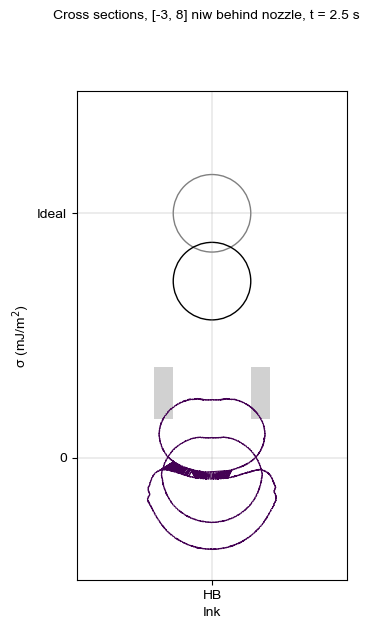

In [661]:
t= 8
bn = 'aj407'
fp3 = XSPlot(SERVERFOLDER, EXPORTFOLDER, 2.5, [-3, t], xunits='niw'
            , overwrite=True, export=False, xvar='ink_transportModel', yvar='sigma'
             , plotNoz=True
            , splitxvar='adjacent_filament_orientation', bn_list=[bn]
             ,xr=[-1.1, 1], yr=[-0.9, 1], imsize=3)

<AxesSubplot:xlabel='y', ylabel='z'>

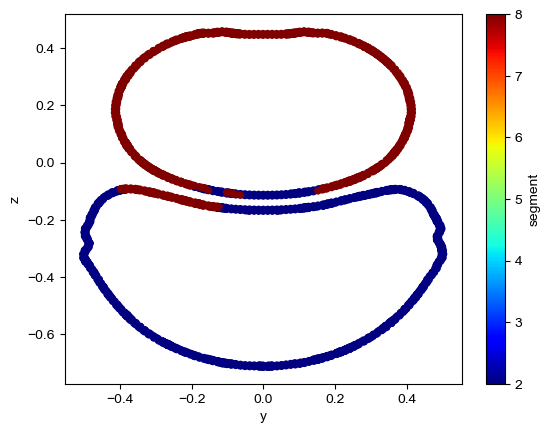

In [662]:
d,u = plainIm(os.path.join(SERVERFOLDER, bn, 'interfacePointsX', f'interfacePoints_t_25_x_{t}_niw.csv'))
d.plot.scatter(x='y', y='z', c='segment', colormap='jet')

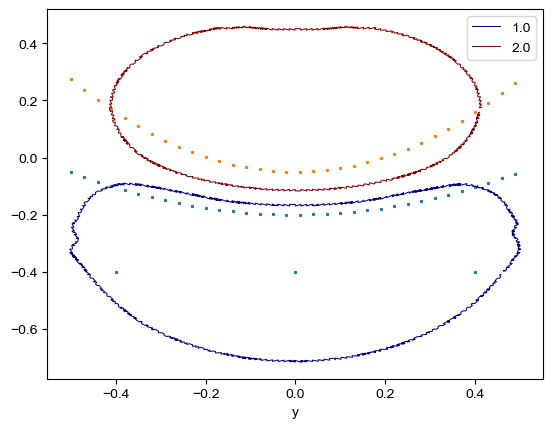

In [663]:
# d2 = d[~((d.y>-.3)&(d.y<-0.1)&(d.z>0.25)&(d.z<0.6))]
sp = slicePoints(d)
sp.sort2SegmentsOutOfPlane(a1=0.6, y1=-0.2
                           , a2=1.3, y2=-0.05
                           , x0=-0.5, xf=0.5, dx=0.03
                           , pts1=[[0, -0.4], [-0.4, -0.4], [0.4, -0.4]])
#sp.sort2SegmentsInPlane(y1=-0.25, y2=-0.25, a1=0.2, a2=0.2, x1=-0.23, x2=-0.19, dy=0.02, y0=-0.25, yf=0.75)
# sp.sortSpreadAroundNozzle(margin=0.02, yB=0.34)
# sp.removeNozzleBottom(yB=0.34)
# sp.selfFlatten()
# sp.splitPoints(True)
# sp.plot()
#sp.simpleCombine(-0.6, 0.3)

In [664]:
plainExp(os.path.join(SERVERFOLDER, bn, 'interfacePointsX', f'interfacePoints_t_25_x_{t}_niw.csv'), sp.combinedf(), u)

INFO:root:Exported //cfs2e.nist.gov/642/NIST_Projects/Additive Manufacturing and Rheology/OpenFOAM/simulations\adjacent\aj407\interfacePointsX\interfacePoints_t_25_x_8_niw.csv
